In [2]:
import pandas as pd
import numpy as np

In [8]:
RE = "Wind_Wallonie_Elia" # Solar_PBE Wind_Wallonie_Elia
address = "https://raw.githubusercontent.com/Jaeik-Jeong/DeepBid/main/"

data_train_csv1 = pd.read_csv(address+"data/"+RE+'_16.csv', index_col=0)
data_train_csv2 = pd.read_csv(address+"data/"+RE+'_17.csv', index_col=0)
data_train_csv  = pd.concat([data_train_csv1, data_train_csv2])
data_val_csv    = pd.read_csv(address+"data/"+RE+'_18.csv', index_col=0)
data_test_csv   = pd.read_csv(address+"data/"+RE+'_19.csv', index_col=0)

data_price = pd.read_csv(address+"data/"+'Price_Elia_Imbalance_16_19.csv', index_col=0)
data_train_csv['Price(€)'] = data_price['Positive imbalance price'][:len(data_train_csv)]
data_val_csv['Price(€)']   = data_price['Positive imbalance price'][len(data_train_csv):len(data_train_csv)+len(data_val_csv)]
data_test_csv['Price(€)']  = data_price['Positive imbalance price'][len(data_train_csv)+len(data_val_csv):]

df = data_train_csv

df.index = pd.to_datetime(df.index,format='mixed')

# Resample the data by day and calculate the cumulative sum
daily_cumulative = df.resample('D').sum().cumsum()

# Display the result
print(daily_cumulative)

             Power(MW)  Capacity(MWp)    Price(€)
Time                                             
2016-01-01     1678.59         9792.0     2333.30
2016-01-02    10363.97        19584.0     4079.71
2016-01-03    15505.40        29376.0     6534.24
2016-01-04    16092.63        39168.0    10097.85
2016-01-05    18142.79        48960.0    12273.52
...                ...            ...         ...
2017-12-27  1453916.62      7196304.0  2692947.28
2017-12-28  1456422.55      7206336.0  2696295.98
2017-12-29  1461527.02      7216368.0  2700566.83
2017-12-30  1467887.24      7226400.0  2704144.93
2017-12-31  1474671.61      7236432.0  2706143.51

[731 rows x 3 columns]


In [12]:
average_price = daily_cumulative.mean()
print(average_price)

Power(MW)        7.509378e+05
Capacity(MWp)    3.602000e+06
Price(€)         1.259895e+06
dtype: float64


                 count        mean        std     min     25%     50%     75%  \
Power(MW)      70176.0   21.013902  24.629163    0.00    2.40   11.23   30.51   
Capacity(MWp)  70176.0  103.118331   1.243055  102.00  102.00  102.00  104.50   
Price(€)       70176.0   38.562237  51.958500 -303.84   10.95   20.04   57.12   

                   max  median     variance  skewness   kurtosis  
Power(MW)       104.84   11.23   606.595667  1.444193   1.261810  
Capacity(MWp)   104.50  102.00     1.545185  0.211853  -1.955174  
Price(€)       1500.00   20.04  2699.685770  5.854746  82.865748  


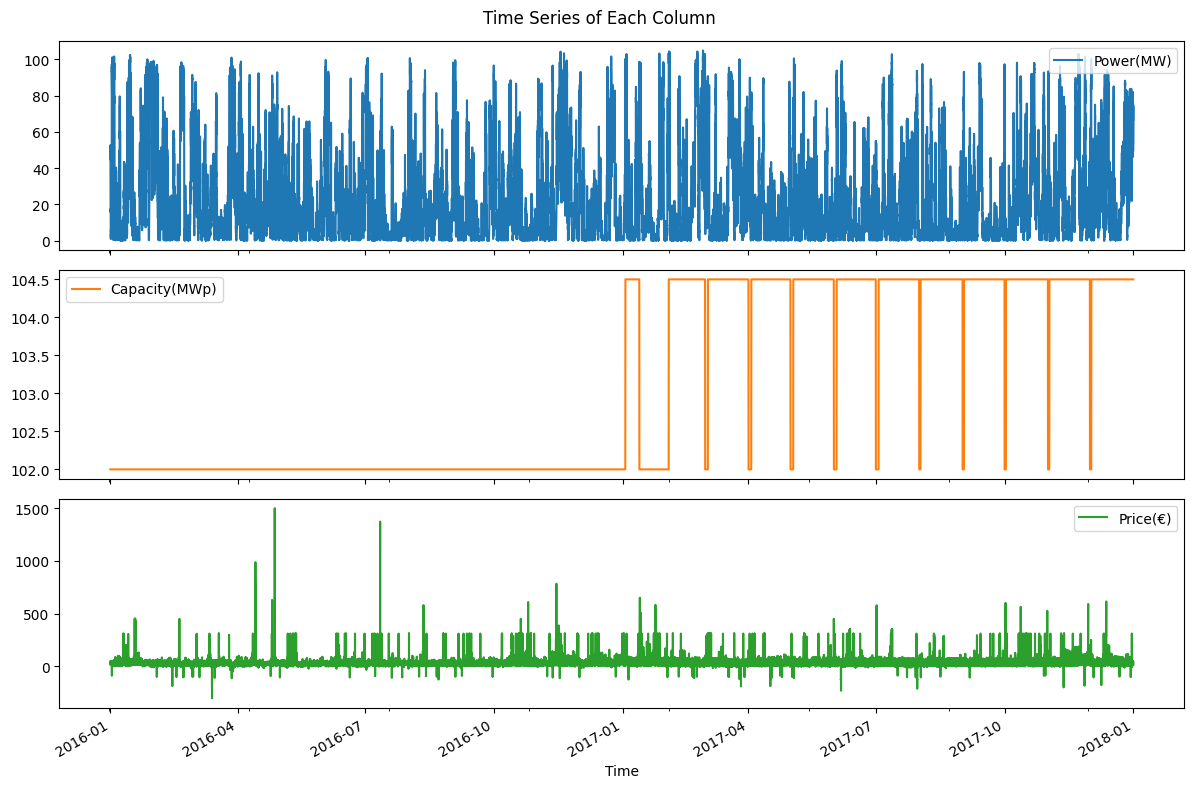

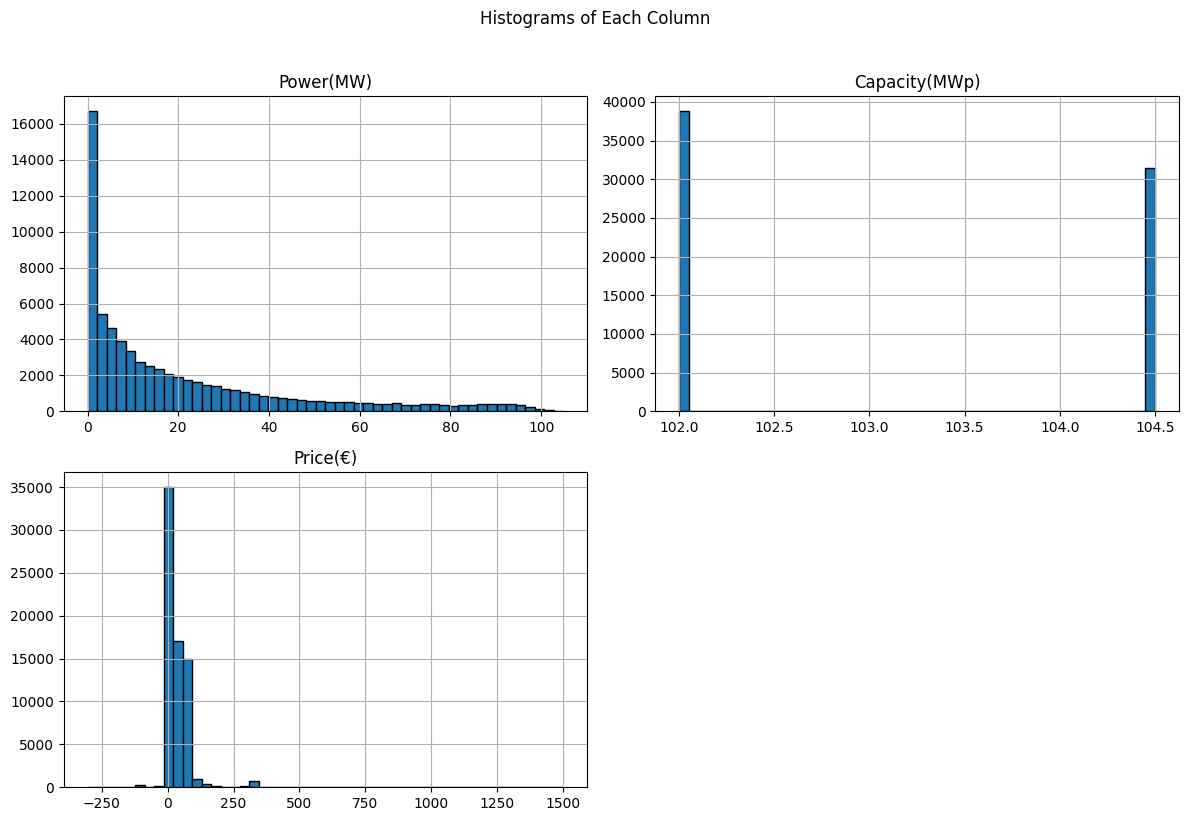

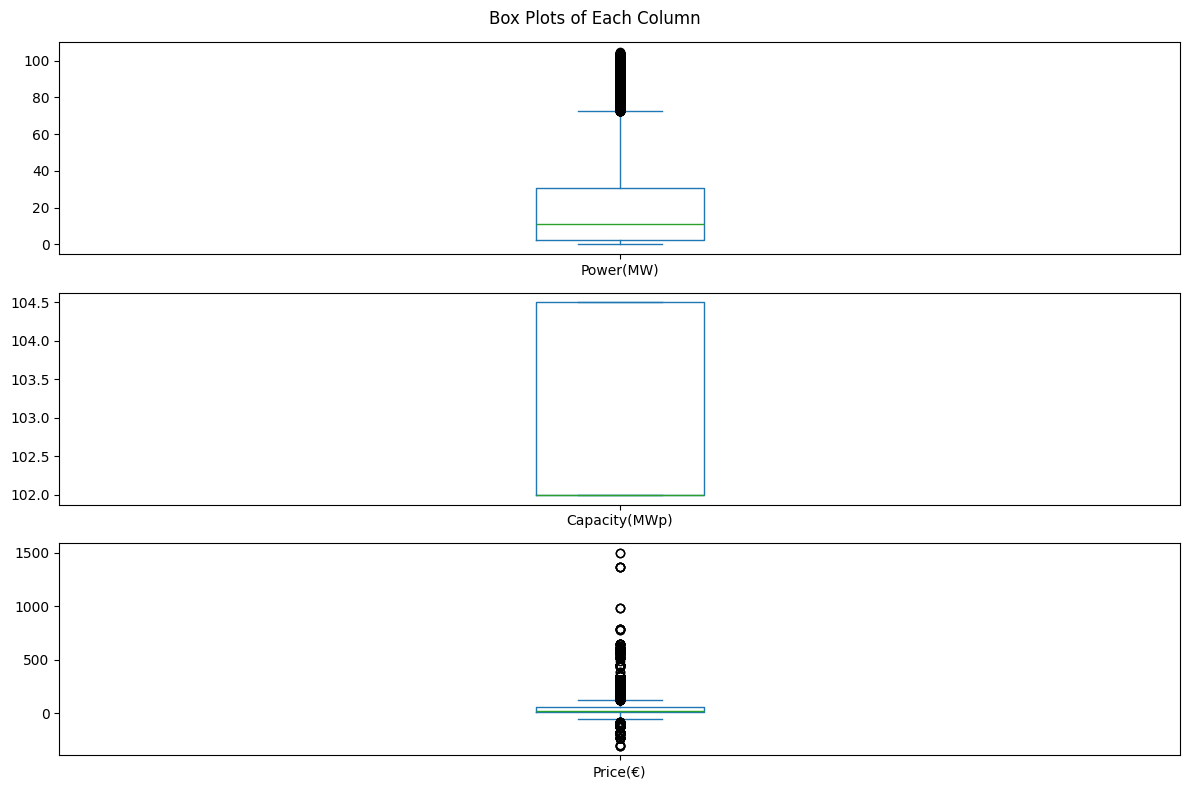

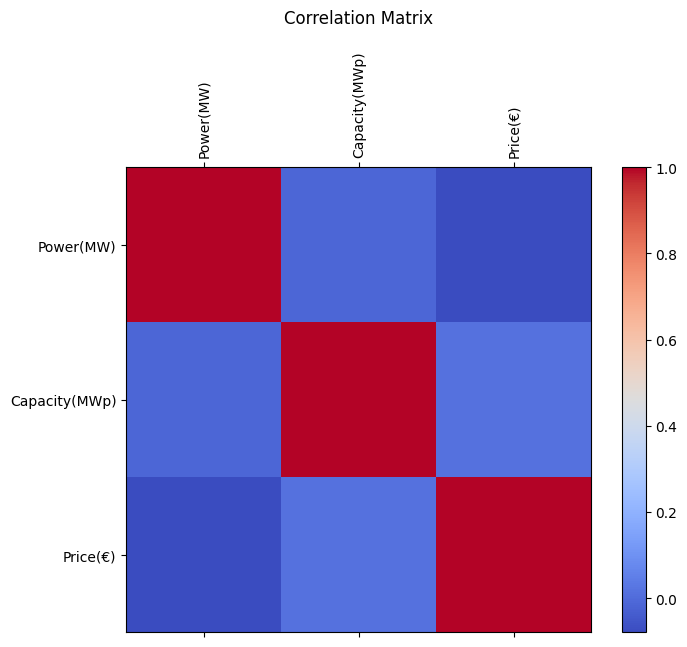

In [14]:
import matplotlib.pyplot as plt
statistics = df.describe().T

# Calculate additional statistics if needed
statistics['median'] = df.median()
statistics['variance'] = df.var()
statistics['skewness'] = df.skew()
statistics['kurtosis'] = df.kurt()

# Display the statistical summary
print(statistics)

# Plotting
# Plot each column to visualize the data

# Plot the time series for each column
df.plot(subplots=True, figsize=(12, 8), title='Time Series of Each Column')
plt.tight_layout()
plt.show()

# Plot histograms for each column to show the distribution
df.hist(bins=50, figsize=(12, 8), edgecolor='black')
plt.suptitle('Histograms of Each Column', y=1.02)
plt.tight_layout()
plt.show()

# Plot box plots for each column to visualize the spread and outliers
df.plot(kind='box', subplots=True, layout=(3, 1), figsize=(12, 8), title='Box Plots of Each Column')
plt.tight_layout()
plt.show()

# If you want to visualize correlations between columns
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr()
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix', pad=20)
plt.show()